Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


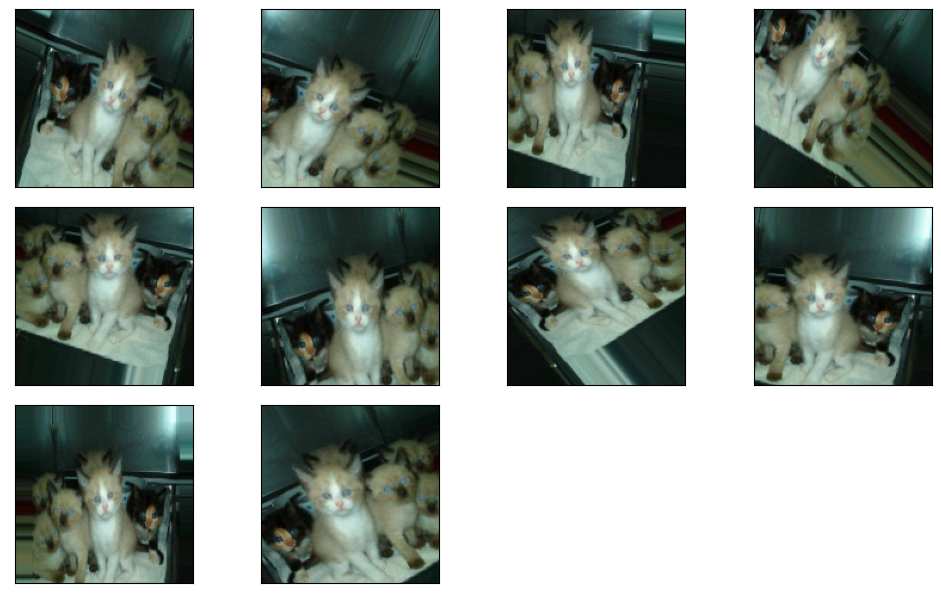

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

C:\Users\clark\AppData\Local\Temp\ipykernel_18616\4183506840.py:96: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/100
 3/20 [===>..........................] - ETA: 28s - loss: 1.8966 - accuracy: 0.5200

KeyboardInterrupt: 

In [17]:
import tensorflow as tf
import numpy as np
import os
from os.path import join, dirname
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

zip_dir_name = dirname(zip_dir)
base_dir = join(zip_dir_name, 'cats_and_dogs_filtered')
train_dir = join(base_dir, 'train')
val_dir = join(base_dir, 'validation')

train_dogs_dir = join(train_dir, 'dogs')
train_cats_dir = join(train_dir, 'cats')

val_dogs_dir = join(val_dir, 'dogs')
val_cats_dir = join(val_dir, 'cats')

total_train = len(os.listdir(train_dogs_dir))+len(os.listdir(train_cats_dir))
total_val = len(os.listdir(val_dogs_dir))+len(os.listdir(val_cats_dir))

data_gen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
      
val_data_gen = ImageDataGenerator(rescale=1./255)

BATCH_SIZE=100
IMG_SHAPE = (150,150)

train_data_gen = data_gen.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    target_size=IMG_SHAPE,
    shuffle=True,
    class_mode='binary'
)

val_data_gen = data_gen.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=val_dir,
    target_size=IMG_SHAPE,
    shuffle=False,
    class_mode='binary'
)

def Plot_Images(images_arr):
    plt.figure(figsize=(10,10))
    for img,i in zip(images_arr, range(20)):
        plt.subplot(5,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img)
    plt.tight_layout()
    plt.show()
augmented_images = [train_data_gen[0][0][0] for i in range(10)]
Plot_Images(augmented_images)
def Model():
    KERNEL_SHAPE =(3,3)
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, KERNEL_SHAPE, activation='relu', input_shape=(150,150,3)),
        tf.keras.layers.MaxPool2D((2,2)),

        tf.keras.layers.Conv2D(64, KERNEL_SHAPE, activation='relu'),
        tf.keras.layers.MaxPool2D((2,2)),

        tf.keras.layers.Conv2D(128, KERNEL_SHAPE, activation='relu'),
        tf.keras.layers.MaxPool2D((2,2)),

        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),  
        tf.keras.layers.Dense(2, activation='softmax')
    ])

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy'])
    model.summary()
    return model

model=Model()

EPOCHS=100
history=model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train/float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val/float(BATCH_SIZE))),
)


def summarize_model_diagnostics():
    loss, acc = history.history['loss'], history.history['accuracy']
    val_loss, val_acc = history.history['val_loss'], history.history['val_accuracy']
    fig, ax=plt.subplots(1,2, figsize=(20,10))
    ax[1].plot(range(EPOCHS), loss, label='loss',color='blue')
    ax[1].plot(range(EPOCHS), val_loss, label='val loss', color='r')
    ax[1].legend(loc='upper_right')
    ax[1].set_title('Loss')

    ax[0].plot(range(EPOCHS), acc, label='accuracy',color='blue')
    ax[0].plot(range(EPOCHS), val_acc, label='val accuracy', color='r')
    ax[0].legend(loc='upper_right')
    ax[0].set_title('Accuracy')
    plt.title('Training & Validation Performance')
    plt.tight_layout()
    plt.show()

    
summarize_model_diagnostics()




